In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

([<matplotlib.patches.Wedge at 0x23bb1ba00c8>,
 [Text(0.009358124911997105, 1.0999601926879587, 's'),
  Text(-0.8789937249907459, -0.6613395734619948, 'n'),
  Text(0.23884487736655557, -1.0737565480851585, 'a'),
  Text(0.8308685231238587, -0.7208727330687282, 'v'),
  Text(1.0081941711664915, -0.43993694232913827, 'y'),
  Text(1.0905058768055351, -0.14421141651267197, 'c')])

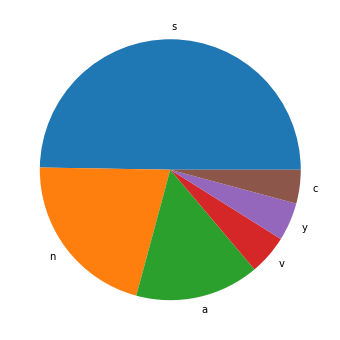

In [8]:
plt.figure(figsize=(6,6))
plt.pie(df["population"].value_counts(),data=df,labels=df["population"].unique())


In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


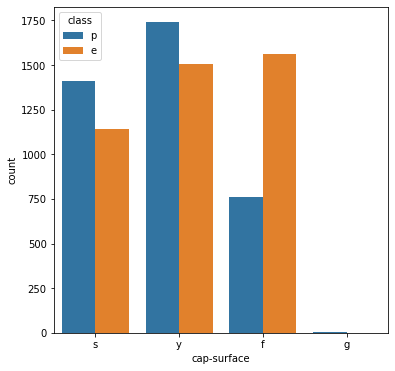

In [10]:
plt.figure(figsize=(6,6))
sns.countplot("cap-surface",hue="class",data=df)

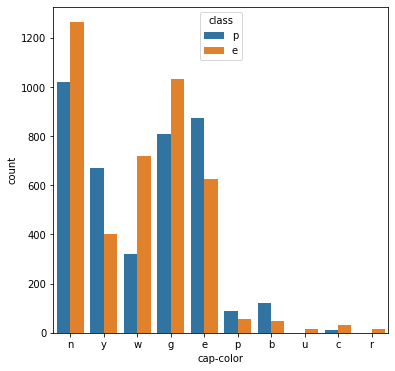

In [11]:
plt.figure(figsize=(6,6))
sns.countplot("cap-color",hue="class",data=df)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
LE= LabelEncoder()
for i in df.columns:
    df[i]=LE.fit_transform(df[i])

In [17]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


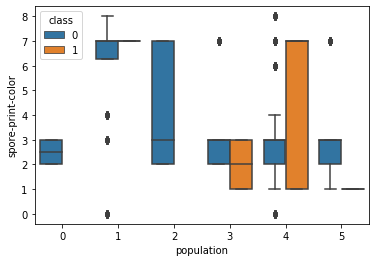

In [19]:
sns.boxplot(x='population',y='spore-print-color',hue='class',data=df)

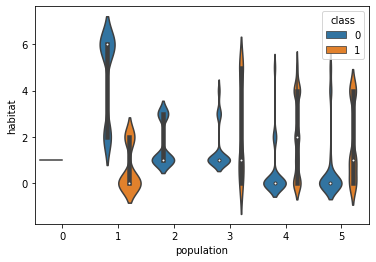

In [20]:
sns.violinplot(x='population',y='habitat',hue='class',data=df)

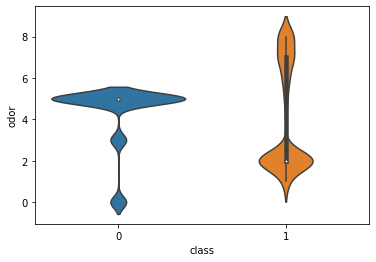

In [22]:
sns.violinplot(x='class',y='odor',data=df)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X=df.drop('class',axis=1)
y=df['class']
from sklearn.model_selection import train_test_split

In [25]:
l= LogisticRegression()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
l.fit(X_train,y_train)
p= l.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
print(classification_report(p,y_test))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1269
           1       0.94      0.95      0.95      1169

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [33]:
print(confusion_matrix(p,y_test))

[[1201   68]
 [  56 1113]]


# K  Means clusturing

In [35]:
from sklearn.cluster import KMeans

In [37]:
k=KMeans(n_clusters=2)

In [38]:
k.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
k.cluster_centers_

array([[3.27226277, 2.42335766, 3.12846715, 0.06058394, 5.55912409,
        1.        , 0.05182482, 0.88759124, 0.17226277, 0.88759124,
        0.0080292 , 1.52189781, 1.53284672, 6.4270073 , 6.42116788,
        0.        , 2.        , 1.11240876, 0.23941606, 6.98394161,
        3.76423358, 2.16934307],
       [3.3839203 , 1.6392493 , 4.93350324, 0.52849861, 3.697405  ,
        0.96478221, 0.19323448, 0.12256719, 6.29587581, 0.46987952,
        1.43767377, 1.59105653, 1.62442076, 5.60217794, 5.58086191,
        0.        , 1.95273401, 1.05653383, 2.93095459, 2.53985171,
        3.60936052, 1.29216867]])

In [41]:
k.labels_

array([1, 1, 1, ..., 1, 0, 0])